# Spike Notebook

a simplified environment for processing 1D Bruker FTICR datasets with `SPIKE`

# FTICR-MS Processing and Display

***Usage***

- Run each python cell in sequence by using the ⇥Run button above (or typing *shift* Enter).
- Cells are meant to be used in order, taking you to the complete analysis, but you can go back at any time.
- The SPIKE code used for processing is visible in the cells, and can be used as a minimal tutorial.
- You can hide it when done to present a clean NoteBook.

***Remark*** *to use this program, you should have installed the following packages:*

- *a complete scientific python environment ( tested with python 3.9 / [anaconda](https://www.anaconda.com/)  with no support for python 2.7 )*
- [`spike`](https://www.bitbucket.org/delsuc/spike) ( *version 0.99.32 minimum* )
- [`ipywidgets`](https://ipywidgets.readthedocs.io/en/latest/)  ( *tested with version 7.6* )
- [`ipympl`](https://github.com/matplotlib/jupyter-matplotlib)  ( *adds interactivity in the notebook* )
- mass analysis requires [`isotope`](https://github.com/delsuc/isotope) and fine isotopic requires [Neutronstar](https://bitbucket.org/orserang/neutronstar.git)

## Initialization
the following cell is to be run once, at the beginning of the processing


### Initialization of the environment
the following cell should be run only once, at the beginning of the processing

## STARTING Environment...


Interactive module version, 1.3.0


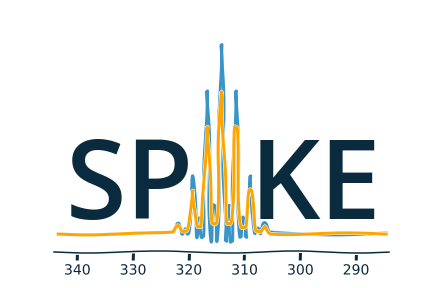

Run date: 2023-03-09T18:59:35.095978


## ...program is Ready

In [2]:
# load all python and interactive tools - has to be run only once (but it does not hurt to rerun...)
from IPython.display import display, HTML, Markdown, Image
display(Markdown('## STARTING Environment...'))
import matplotlib as mpl
%matplotlib widget
import os.path as op
import numpy as np
import pandas as pd
import spike
from spike.Interactive import INTER as I
from spike.Interactive import FTICR_INTER as FI
try:
    from spike.Interactive import MSIsotopic as ISO
except ImportError:
    print ("Isotopic patternd not installed")
from spike.Interactive.ipyfilechooser import FileChooser
from spike.File import BrukerMS
from datetime import datetime
I.initialize()
print('Run date:', datetime.now().isoformat() )
display(Markdown('## ...program is Ready'))
from importlib import reload  # this line is debugging help

# configurable items - you may change them to fit you preferences
verbose = 1                              # chose from 0 (terse) to 3 more verbose
mpl.rcParams['figure.figsize'] = (8,4)   # (X,Y) default figure size
I.Activate_Wheel = True                  # True/False    scale with wheel control in the graphic cells 

### Choose the file
The `FileChooser()` tool creates a dialog box which allows to choose a file on your disk

- use the `Select` button, click on the directory to move around `..` is for going back in the directory tree
- click on the file to select it
- modify the ( *optional* ) `path` argument, to start the exploration on a given location
- changing to `path='.'` will start the browsing from the current directory 
- After the selection, the selected filename is found in `FC.selected`

Bruker files are named `fid` and are contained in a `*.d` directory.

In [3]:
FC = FileChooser(path='/DATA', filetype='fid')
display(FC)

FileChooser(path='/DATA', filename='', show_hidden='False')

### Import dataset and display FID

This is simply done with the `Import_1D()` tool, which returns a `SPIKE` object.

We store the dataset into a variable, here called d1. 

In [5]:
print('Reading file ',FC.selected)
d1 = BrukerMS.Import_1D(FC.selected)           # Import_1D creates a SPIKE FTICRData object, from which everything is available
d1.set_unit('sec')                             # it can be acted upon
d1.filename = FC.selected                      # and be extended at will
print(d1)                                      # print() of the dataset shows a summary of the parameters

I.Show1D(d1, title=FC.selected, yratio=1)      # and display  (yratio=1 to have it centered)
# alternatively you can use the low-level tool below:
# d1.display()  # with many options, plus access to matplotlib details

Reading file  /DATA/Ubiquitin/Ubiquitin CID_000001.d/fid
FTICR data-set
Bo: 15.00
Single Spectrum data-set
FT-ICR axis at 1500.000000 kHz,  4194304 real points,  from physical mz =  153.524   to m/z = 3000.000  R max (M=400) = 1609819


Show1D(children=(VBox(children=(Button(button_style='success', description='Reset', layout=Layout(width='80px'…

Spectra can be interactively explored with the jupyter tools displayed  on the side of the dataset:

- zoom with <button class="jupyter-matplotlib-button jupyter-widgets jupyter-button" href="#" title="Zoom to rectangle" style="outline: currentcolor none medium;"><i class="center fa fa-square-o"></i></button>
- shift and resize
<button class="jupyter-matplotlib-button jupyter-widgets jupyter-button" href="#" title="Pan axes with left mouse, zoom with right" style="outline: currentcolor none medium;"><i class="center fa fa-arrows"></i></button>
 (with left and right click)
- <button class="jupyter-matplotlib-button jupyter-widgets jupyter-button" href="#" title="Back to previous view" style="outline: currentcolor none medium;"><i class="center fa fa-arrow-left"></i></button>
and
<button class="jupyter-matplotlib-button jupyter-widgets jupyter-button" href="#" title="Forward to next view" style="outline: currentcolor none medium;"><i class="center fa fa-arrow-right"></i></button>
allow to navigate in the zoom history

- <button class="jupyter-matplotlib-button jupyter-widgets jupyter-button" href="#" title="Download plot" style="outline: currentcolor none medium;"><i class="center fa fa-fw fa-floppy-o"></i></button> is used to store a `png` graphic file of the current display.

The drawing zone can be resized using the little grey triangle on the lower-right corner



## Basic Processing
The following cell applies a basic processing, check the documentation for more advanced processing

### Compute Spectrum

many processing methods are available, they can be either applied one by one, or piped by chaining them.

Here we are chaining  apodisation - zerofill - FT - modulus

then setting to `m/z` unit (`Hz` and `points` also available) - finally `display()` is used to display the dataset.


Show1D(children=(VBox(children=(Button(button_style='success', description='Reset', layout=Layout(width='80px'…

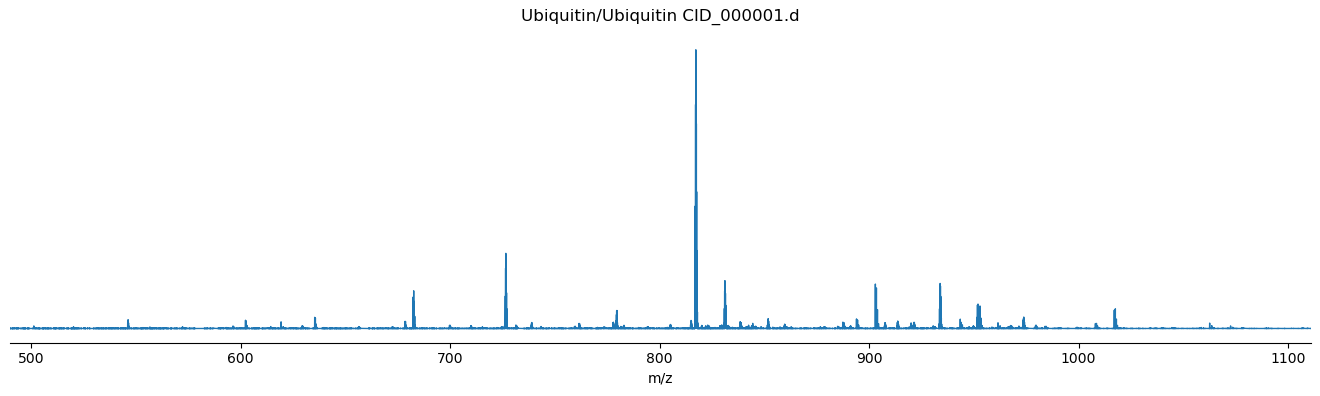

In [6]:
D1 = d1.copy()                               # copy the imported data-set to another object for processing
D1.center().kaiser(4).zf(4)   # chaining  centering - apodisation - zerofill
                              # kaiser(4) is an apodisation well adapted to FTICR, slightly more resolution than hamming - try varying the argument !
if D1.axis1.itype == 0:       # means data is real (common case)
    D1.rfft().modulus()           # chaining  real FT - modulus
else:                         #       data is complex, in Narrow-band acquisition
    D1.fft().modulus()            # chaining  complex FT - modulus
D1.bcorr(xpoints=50)          # flatten the baseline
D1.set_unit('m/z')

FI.Show1D(D1, title=FC.nmrname)  #  and display

# D1.display(title=FC.selected_path)  #  alternative, lower level display method with more options

### Peak Detection
The following is used to perform an interactive peak picking, and output the result
Use the cursor to choose the sensitivity of the picker.

number of on-screen peaks is limited to 100 - zoom in with the top tool to be sure of visualizing them all


Output(layout=Layout(border='1px solid red'))

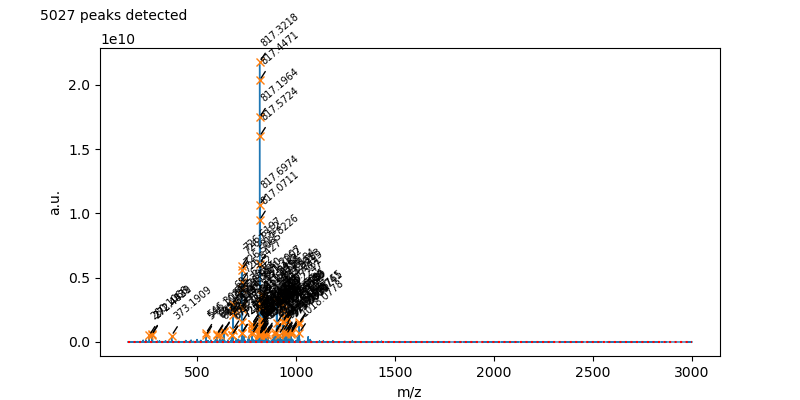

In [7]:
pkname = op.join(op.dirname(FC.selected),"peak_list.txt")
import spike.plugins.Peaks
print("number of on-screen peaks is limited to %d - zoom in with the top tool to be sure of visualizing them all"%(FI.NbMaxDisplayPeaks))
P = FI.MSPeaker(D1, pkname)

## Superpose experimental and computed spectra
*The MS-Isotopic module must have been installed - see first cell for information*

If the spectrum requires recalibration - eventually run the Calibration tool below, and rerun this tool.

In [18]:
try:
    IS = ISO.Isotope()
    Full = IS.full(D1)
except NameError:
    print("MSIsotopic not installed - see top of the page")   # error message if additional software not installed
Full

Box(children=(Box(children=(Label(value='Enter formula:', layout=Layout(flex='3', width='auto')), Dropdown(lay…

---
### Calibration and reference peaks

The calibration used by SPIKE is based on a 2 or 3 parameters equation :
$$
f = \frac{A}{m/z} - B + \frac{C}{(m/z)^2}
$$
You can change them below.

For the moment you can recalibrate on a single reference peak, 
this modifies the first order $A$ parameter only.


In [11]:
reload(FI)
FI.Calib(D1);

### Save processed data
You can save a dataset, two formats are available:

- Native SPIKE format, `*.msh5` where all informations are stored - run the following cell

In [ ]:
msh5name = op.join(op.dirname(FC.selected),"SpikeProcessed.msh5")
D1.save_msh5(msh5name, compressed=True)
print("File is stored as %s"%msh5name)

- Or `cvs` format, with only the spectrum (for the peak list, see above) - ( *be carefull this file can be very big*)

In [ ]:
csvname = op.join(op.dirname(FC.selected),"SpikeProcessed.csv")
D1.save_csv(csvname)
print("File is stored as %s"%csvname)

### superimpose spectra
you can superimpose several spectra stored as `.msh5` files in order to compare them

In [12]:
reload(FI)
from IPython.display import display
SP = FI.SuperImpose(base='/DATA',N=3).Show()

Label(value='Select a file, and click on the Copy button to copy it to the chosen slot')

Button(button_style='info', description='Display', layout=Layout(width='10%'), style=ButtonStyle(), tooltip='d…

Output(layout=Layout(border='1px solid black'))

*the following cell display the colormap used here*

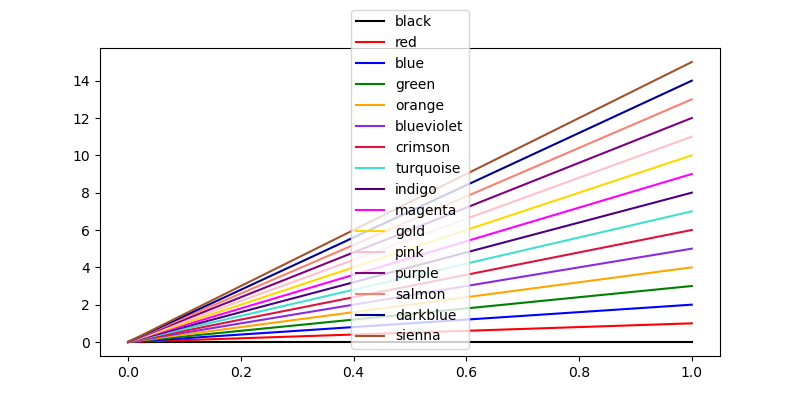

In [13]:
import matplotlib.pylab as plt
plt.figure()
for i ,c in enumerate(FI.Colors):
    plt.plot([0,1],[0,i],'-',color=c,label=c)
plt.legend()